**Завдання**
## Застосуйте до  зображення **titanic.jpg** методи детекції облич **Віолі-Джонса** та **HOG**.

In [1]:
# Required libraries.
import dlib
from imutils import face_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np

# **<font color='red'>Violi-Jons Face Detection</font>**

### <font color='navy'>For this algorithm I have chosen another image – 'family.jpg'</font>

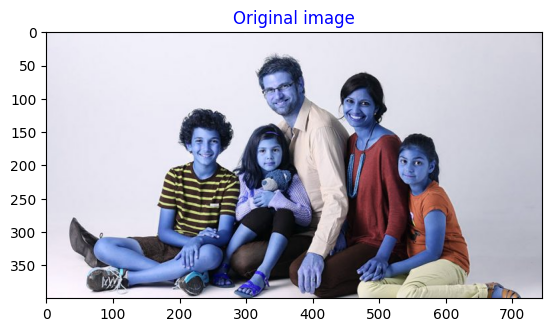

In [2]:
# Reading and displaying an image.
family_img = cv2.imread('family.jpg')
plt.title('Original image', color='blue')
plt.imshow(family_img)
plt.show()

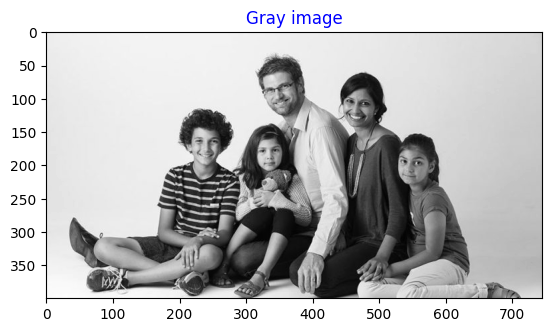

In [3]:
# Transform the image to gray color.
gray_fam_img = cv2.cvtColor(family_img, cv2.COLOR_BGR2GRAY)
plt.title('Gray image', color='blue')
plt.imshow(gray_fam_img, cmap='gray')
plt.show()

In [6]:
# Load the classifier and create a cascade object for face detection.
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +
                                        'haarcascade_frontalface_default.xml')

In [7]:
# Applying the face detection method on the grayscale image.
faces_detected = face_classifier.detectMultiScale(gray_fam_img,
                                                  scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

In [8]:
# Iterating through rectangles of detected faces.
for (column, row, width, height) in faces_detected:
  cv2.rectangle(family_img, (column, row), (column + width, row + height), (0, 255, 0), 2)

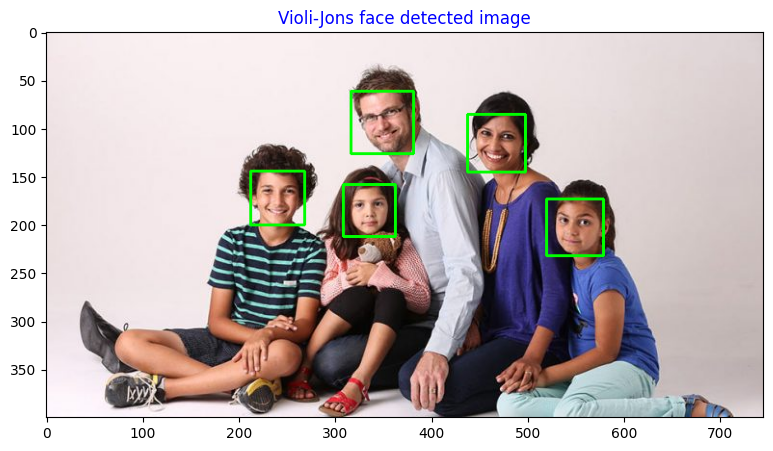

In [9]:
# Displaying the image with face detected.
img_detected = cv2.cvtColor(family_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.title('Violi-Jons face detected image', color='blue')
plt.imshow(img_detected)
plt.show()

# **<font color='red'>HOG Face Detection with Dlib library</font>**

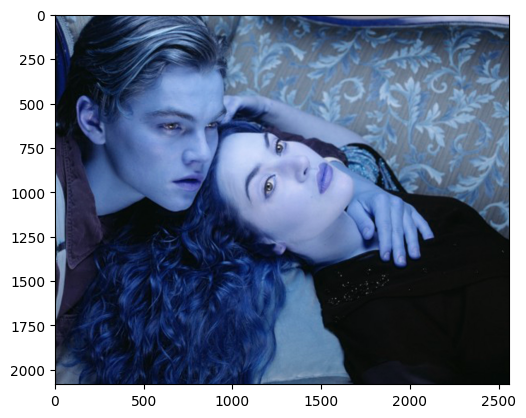

In [10]:
# Reading and displaying an image.
titanic_img = cv2.imread('titanic.jpg')
plt.imshow(titanic_img)
plt.show()

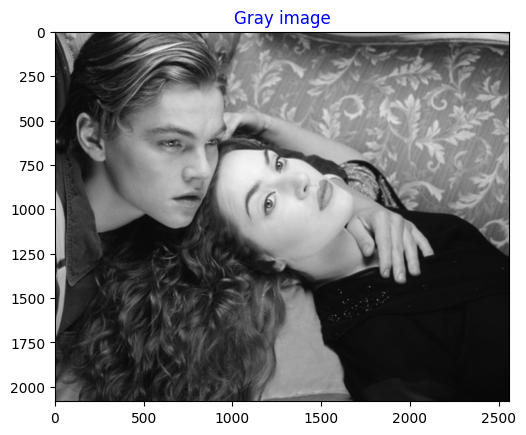

In [11]:
# Making a gray image.
gray_titan_img = cv2.imread('titanic.jpg', 0)
plt.title('Gray image', color='blue')
plt.imshow(gray_titan_img, cmap='gray')
plt.show()

In [12]:
# Making a numpy array.
img_array = np.float32(gray_titan_img) / 255.0

# Computing gradients.
g_X = cv2.Sobel(img_array, cv2.CV_32F, 1, 0, ksize=1)
g_y = cv2.Sobel(img_array, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(g_X, g_y, angleInDegrees=True)

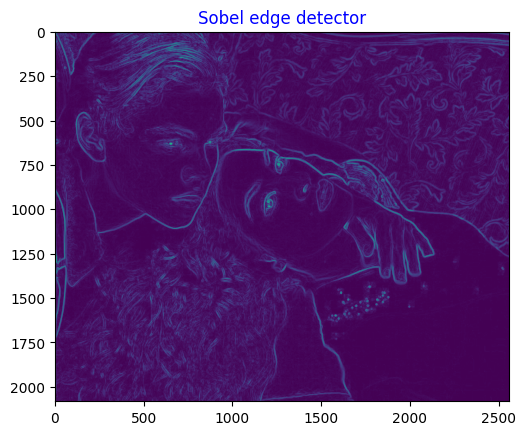

In [18]:
# Displaying the image.
plt.title('Sobel edge detector', color='blue')
plt.imshow(mag)
plt.show()

In [14]:
# Applying HOG face detector and faces.
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray_titan_img, 1)

# Loop through each face and draw a rect around it.
for (i, rect) in enumerate(rects):
  (x, y, w, h) = face_utils.rect_to_bb(rect)

  # Draw a rectangle.
  cv2.rectangle(gray_titan_img, (x, y), (x + w, y + h), (255, 255, 255), 3)

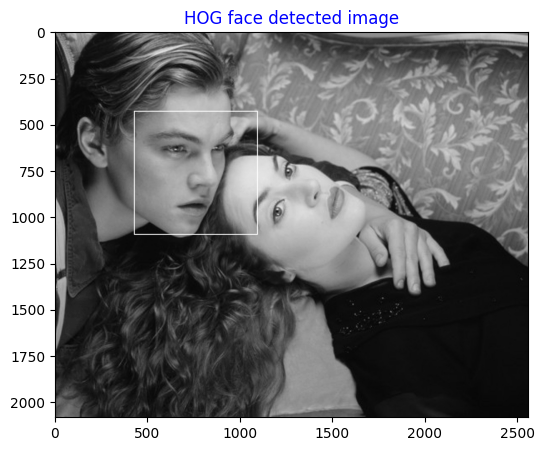

In [17]:
# Displaying the image with face detected.
plt.figure(figsize=(10, 5))
plt.title('HOG face detected image', color='blue')
plt.imshow(gray_titan_img, cmap='gray')
plt.show()